Example 9 - Hydrodinamic Journal Bearings (using Fluid Flow methods)
=====
In this example, we use the hydrodinamic bearing seen in Example 5.5.1 from 'Dynamics of Rotating Machinery' by MI Friswell, JET Penny, SD Garvey & AW Lees, published by Cambridge University Press, 2010.

It is the same bearing of Example 7, only this time we stick to the methods provided by the Fluid Flow subpackage of ROSS. We instantiate a Pressure Matrix object with the data given by the Example 5.5.1 from the book: The oil-film bearing has a diameter of 100 mm, is 30 mm long, and supports a static load of 525 N. The radial clearance is 0.1 mm and the oil film has a viscosity of 0.1 Pa s. When instantiated, a Pressure Matrix must be given either the eccentricity, or load of the bearing, or both. The one not parameter not given is them calculated based on the other one.

In [1]:
from bokeh.io import output_notebook, show
from ross.fluid_flow import fluid_flow as flow
from ross.fluid_flow.fluid_flow_geometry import sommerfeld_number,\
    modified_sommerfeld_number
from ross.fluid_flow.fluid_flow_graphics import matplot_eccentricity,\
    plot_pressure_theta
from ross.fluid_flow.fluid_flow_coefficients import calculate_analytical_stiffness_matrix,\
    calculate_analytical_damping_matrix
    
import numpy as np
output_notebook()


Loading BokehJS ...

In [2]:
# Instantiating a Pressure Matrix
nz = 30
ntheta = 528
nradius = 11
length = 0.03
omega = 157.1
p_in = 0.
p_out = 0.
radius_rotor = 0.0499
radius_stator = 0.05
load = 525
visc = 0.1
rho = 860.
my_fluid_flow = flow.FluidFlow(nz, ntheta, nradius, length, omega, p_in,
                                    p_out, radius_rotor, radius_stator,
                                    visc, rho, load=load)

In [3]:
# Getting the eccentricity

my_fluid_flow.eccentricity

2.6627188685691435e-05

In [4]:
# Calculating the modified sommerfeld number and the sommerfeld number

modified_s = modified_sommerfeld_number(
    my_fluid_flow.radius_stator,
    my_fluid_flow.omega,
    my_fluid_flow.viscosity,
    my_fluid_flow.length,
    my_fluid_flow.load,
    my_fluid_flow.radial_clearance
)

sommerfeld_number(
    modified_s,
    my_fluid_flow.radius_stator,
    my_fluid_flow.length
)

3.5718916513907613

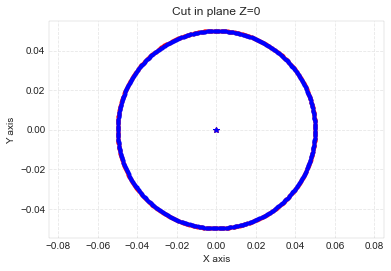

In [5]:
# Plotting the eccentricity

matplot_eccentricity(my_fluid_flow)

The graphic above plots two circles: one representing the stator and one representing the rotor, considering the eccentricity. In this case, since the space between the stator and the rotor is very small, it is not seen in the graphic.

In [6]:
# Getting the stiffness matrix

calculate_analytical_stiffness_matrix(
    my_fluid_flow.load,
    my_fluid_flow.eccentricity_ratio,
    my_fluid_flow.radial_clearance
)

[12808062.43570496, 16395796.329160627, -25061769.791664664, 8814873.993177759]

In [7]:
# Getting the damping matrix

calculate_analytical_damping_matrix(
    my_fluid_flow.load,
    my_fluid_flow.eccentricity_ratio,
    my_fluid_flow.radial_clearance,
    my_fluid_flow.omega
)

[232892.5172631672, -81914.33449011963, -81914.33449011963, 294893.1749179313]

The stiffness and damping matrices can be calculated analytically using the methods above.

Once the object Fluid Flow is instantiated, the user must call a method to calculate its pressure matrix. There are 3 methods available: two that calculate the pressure analyticaly and one that calculate it numerically. The first one is based on the book Tribology Series vol. 33, by Frene et al., chapter 5. The second one is based on chapter Linear and Nonlinear Rotordynamics, by Ishida and Yamamoto, from the book Flow-Induced Vibrations. The numerical method was developed as part of project ROSS and it was based on the undergraduate dissertation by Luiz Henrique Mamede Queiroz: Analysis of fluid flow inside rotary machines components. 

In [8]:
# Calculating pressure matrix

my_fluid_flow.calculate_pressure_matrix_numerical()[int(nz/2)]

array([0.00000000e+00, 8.90360442e+02, 2.54822910e+03, 4.20657895e+03,
       5.86560049e+03, 7.52548383e+03, 9.18641901e+03, 1.08485957e+04,
       1.25122034e+04, 1.41774313e+04, 1.58444681e+04, 1.75135023e+04,
       1.91847223e+04, 2.08583159e+04, 2.25344705e+04, 2.42133734e+04,
       2.58952114e+04, 2.75801707e+04, 2.92684374e+04, 3.09601967e+04,
       3.26556336e+04, 3.43549326e+04, 3.60582777e+04, 3.77658517e+04,
       3.94778375e+04, 4.11944168e+04, 4.29157706e+04, 4.46420796e+04,
       4.63735231e+04, 4.81102797e+04, 4.98525271e+04, 5.16004419e+04,
       5.33541997e+04, 5.51139750e+04, 5.68799414e+04, 5.86522705e+04,
       6.04311332e+04, 6.22166988e+04, 6.40091353e+04, 6.58086089e+04,
       6.76152842e+04, 6.94293242e+04, 7.12508903e+04, 7.30801417e+04,
       7.49172355e+04, 7.67623273e+04, 7.86155702e+04, 8.04771151e+04,
       8.23471105e+04, 8.42257025e+04, 8.61130346e+04, 8.80092473e+04,
       8.99144788e+04, 9.18288643e+04, 9.37525353e+04, 9.56856209e+04,
      

In [9]:
# Plotting pressure along theta in a chosen z

show(plot_pressure_theta(my_fluid_flow, z=int(nz/2)))